# Time series of surface temperature

In [23]:
DOCUMENT_ID = "12345"
BUCKET_NAME = "default"

In [1]:
from couchbase_funcs import connect_couchbase
from couchbase_funcs import get_by_key
import json
import pandas as pd

In [2]:
cb_coll = connect_couchbase(BUCKET_NAME)
data = get_by_key(cb_coll, DOCUMENT_ID)

In [18]:
data_json = json.loads(data)
entry_data = pd.json_normalize(data_json['entries'])
df = pd.DataFrame( entry_data )
df['axes.time'] = pd.to_datetime(df['axes.time'])

Convert from absolute temperature to Celsius

In [20]:
i = 0
for temp in df['data.Temperature_surface']:
    temp = temp - 273.15
    df.loc[i, ['data.Temperature_surface']] = temp
    i = i + 1

Plot time series data

<AxesSubplot:xlabel='axes.time'>

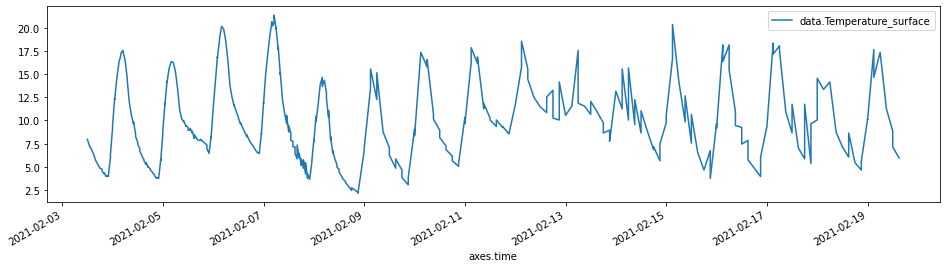

In [22]:
df.plot( x='axes.time', y='data.Temperature_surface', figsize=(16,4) )